In [32]:
import face_recognition
import os
import matplotlib.image as img
import matplotlib.pyplot as pp

In [135]:
images = os.listdir('images')
print(images)

['강해린.jpg', '사쿠라.jpg', '아린.jpg', '유재석.jpg', '일반인.jpg', '일반인2.jpg', '카즈하.jpg', '하니.jpg']


In [137]:
image_to_be_matched = face_recognition.load_image_file('4.jpg')

In [138]:
image_to_be_matched_encoded = face_recognition.face_encodings(image_to_be_matched)[0]

Matched: 카즈하.jpg


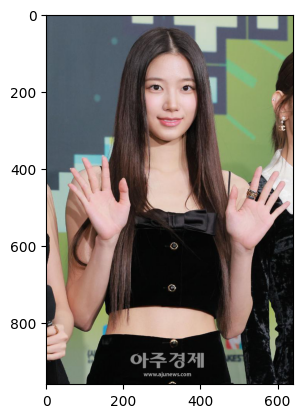

In [151]:
import face_recognition
from matplotlib import pyplot as plt
import matplotlib.image as img

# load the image to be matched
image_to_be_matched = face_recognition.load_image_file('3.jpg')
image_to_be_matched_encoded = face_recognition.face_encodings(image_to_be_matched)[0]

# load all the images in the directory

images = os.listdir('images')

# Calculate the face distance for each image and store it in a dictionary
distances = {}
for image in images:
    current_image = face_recognition.load_image_file("images/" + image)
    current_image_encoded = face_recognition.face_encodings(current_image)[0]
    distance = face_recognition.face_distance([image_to_be_matched_encoded], current_image_encoded)
    distances[image] = distance

# Sort the dictionary by distance and get the closest image
closest_image = min(distances, key=distances.get)

# Print the closest image and display it
print("Matched: " + closest_image)
fileName = "images/" + closest_image
ndarray = img.imread(fileName)
plt.imshow(ndarray)
plt.show()


당신이 닮은 연예인은 : 강해린.jpg입니다.


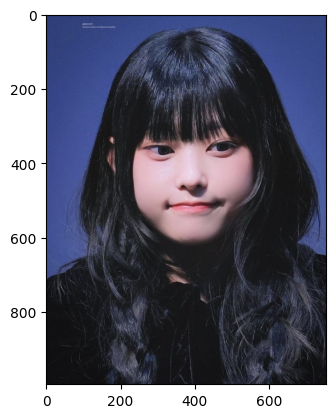

In [139]:
best_match_distance = 1
best_match_image = None

for image in images:
    current_image = face_recognition.load_image_file("images/" + image)
    current_image_encoded = face_recognition.face_encodings(current_image)[0]
    result = face_recognition.compare_faces([image_to_be_matched_encoded], current_image_encoded)
    if result[0] == True :
        print("당신이 닮은 연예인은 : " + image + "입니다.")
        fileName = "images/" + image
        ndarray = img.imread(fileName)
        pp.imshow(ndarray)
        pp.show()
        break
    #else:
        #print("Not matched: " + image)
    # 가장 일치율이 높은 이미지 업데이트

In [148]:
face_recognition.face_encodings(image_to_be_matched)

[]

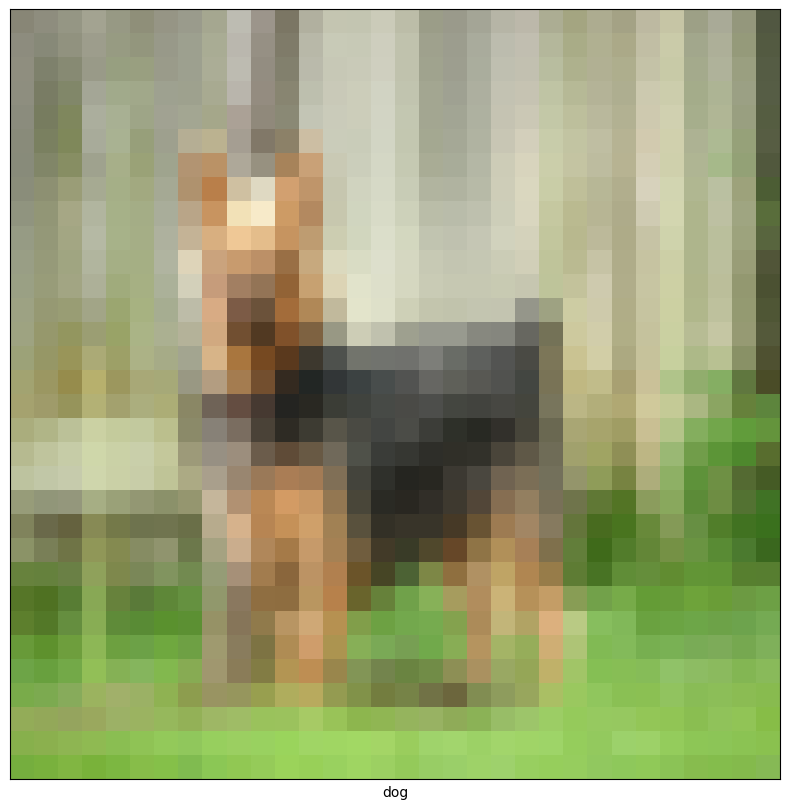

In [75]:
from tensorflow.keras import datasets
import tensorflow as tf
# 케라스 데이터셋을 다운받아 변수에 각각 넣어준다.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()



#--------------------------------------- 여기부터 안해도됨
# 라벨 설정
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 이미지 불러보기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()

In [71]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=True, input_shape = (224, 224 ,3), weights = 'imagenet')

In [72]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [76]:
base_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

for i in range(5):
  inputs = test_images[i]                 # Test_images의 i번째 이미지에 대한 평가 
  inputs = tf.expand_dims(inputs, axis=0) # ResNet이 원하는 이미지 차원은 (None, 224, 224, 3)이므로 차원 하나를 더 추가해준다.
  x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs) # ResNet의 인풋사이즈에 맞춰준다. > 안맞춰도 돌아가지만 성능을 위해
  x = tf.keras.applications.resnet50.preprocess_input(x)  # 이전단계에서 안맞춰도 돌아가는 이유 > 바로 이 전처리 모듈이 있어서 알아서 맞춰주긴함
  base_model.evaluate(x, test_labels[i]) 

1/1 [==============================] - 0s 89ms/step - loss: 12.2392 - accuracy: 0.0000e+00


35363/35363 [==============================] - 0s 0us/step


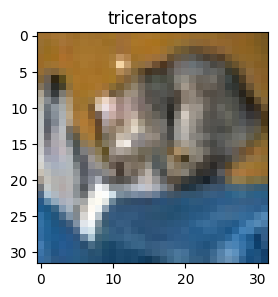

1/1 [==============================] - 0s 83ms/step


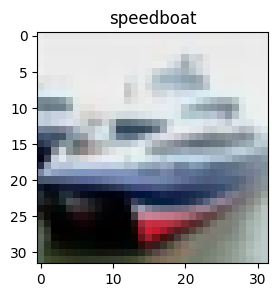

1/1 [==============================] - 0s 85ms/step


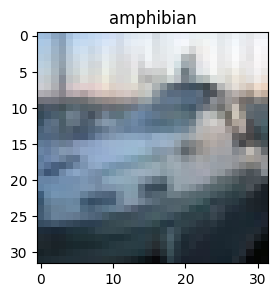

1/1 [==============================] - 0s 84ms/step


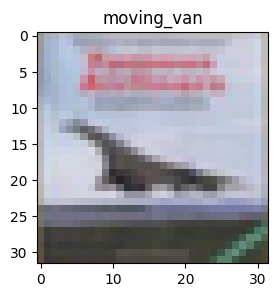

1/1 [==============================] - 0s 86ms/step


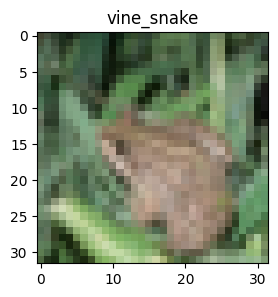

In [77]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import decode_predictions

for i in range(5):

  inputs = test_images[i]
  inputs = tf.expand_dims(inputs, axis=0)
  x = tf.keras.layers.experimental.preprocessing.Resizing(224, 224)(inputs)
  x = tf.keras.applications.resnet50.preprocess_input(x) 

  preds = base_model.predict(x)  # ResNet Model의 예측진행

  # 예측 실행
  fig= plt.figure(figsize=(3,3))
  plt.title(decode_predictions(preds, top=1)[0][0][1])# 타이틀에 예측 명 1순위를 넣는다.
  plt.imshow(test_images[i])	# 이미지는 
  plt.show();

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False, pooling = 'avg' , input_shape = (32,32 ,3), weights = None)

base_model.trainable =True

input_y = tf.keras.utils.to_categorical(train_labels, 10)
test_y = tf.keras.utils.to_categorical(test_labels, 10)

from tensorflow.keras import Input

inputs = Input(shape=(32,32,3))
x = tf.keras.applications.resnet50.preprocess_input(inputs)
x = base_model(x, training=False)
x = Flatten()(x)
outputs = Dense(10, activation = 'softmax')(x)
model_res = tf.keras.Model(inputs, outputs)

In [94]:
model_res.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)

model_res.fit(train_images, input_y, epochs=10, batch_size=256, validation_data=(test_images, test_y), callbacks=[early])


Epoch 1/10


KeyError: 'add_362'

In [85]:
import torch
from torch import nn

In [86]:
class VGG(nn.Module):
    def __init__(self):
        super(VGG, self).__init__()
        self.cnn = nn.Sequential(
            # 3 x 128 x 128
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # 64 x 64 x 64
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # 128 x 32 x 32
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # 256 x 16 x 16
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # 512 x 8 x 8
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
            # 512 x 4 x 4
        )
        self.fc = nn.Sequential(
            nn.Linear(512 * 4 * 4, 4096),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(4096, 2048),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(2048, 30)
        )
    def forward(self, x):
        output = self.cnn(x)
        output = output.view(output.size(0), -1)
        output = self.fc(output)
        return output

In [87]:
a = VGG()

In [88]:
print(a)

VGG(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=